#### United States Energy Consumption 2008 - ALL 50 STATES

#### Data Science Techniques used for Data Cleaning, Wrangling, and Visualization

In [56]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Reading in the csv

In [114]:
df = pd.read_csv("Electricity_Consumption_State_Wise_2008_Untied_States.csv")

In [115]:
df.head()

,Unnamed: 0,Biomass GWh,Unnamed: 2,Unnamed: 3,Geothermal GWh,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,State,NaN,%,NaN,NaN,%,NaN,Solar GWh,%,NaN,...,%,NaN,Nuclear GWh,%,NaN,Other,%,NaN,NaN,Total Generation GWh
1,Alabama,"3,291",2.30%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,22.60%,NaN,"39,716",27.80%,NaN,7,0.00%,NaN,NaN,"142,961"
2,Alaska,4,0.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,2.50%,NaN,0,0.00%,NaN,0,0.00%,NaN,NaN,"6,542"
3,Arizona,160,0.10%,NaN,0,0.00%,NaN,14,0.00%,NaN,...,24.40%,NaN,"30,662",21.40%,NaN,1,0.00%,NaN,NaN,"111,897"
4,Arkansas,"1,478",1.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,8.00%,NaN,"15,170",10.60%,NaN,24,0.00%,NaN,NaN,"57,399"


In [116]:
# creating a list of booleans that tell us which columns have the word 'Unnamed' in them.
# contains_unnamed = df.columns.str.contains('Unnamed')

In [117]:
df.loc[0, :]

Unnamed: 0                       State
Biomass GWh                        NaN
Unnamed: 2                           %
Unnamed: 3                         NaN
Geothermal GWh                     NaN
Unnamed: 5                           %
Unnamed: 6                         NaN
Unnamed: 7                   Solar GWh
Unnamed: 8                           %
Unnamed: 9                         NaN
Unnamed: 10                   Wind GWh
Unnamed: 11                          %
Unnamed: 12                        NaN
Unnamed: 13                  Hydro GWh
Unnamed: 14                          %
Unnamed: 15                        NaN
Unnamed: 16                   Coal GWh
Unnamed: 17                          %
Unnamed: 18                        NaN
Unnamed: 19              Petroleum GWh
Unnamed: 20                          %
Unnamed: 21                        NaN
Unnamed: 22                    Gas GWh
Unnamed: 23                          %
Unnamed: 24                        NaN
Unnamed: 25              

In [118]:
# Replacing 'Unnamed' columns with the values directly underneath them. We are using the contains_unnamed list that we made earlier.
# This is an example of using the zip function which converts a bunch of lists into a single list of tuples.
# Example:
# friends = ['Taha', 'Abdullah', 'Shahzeb']
# ages = [22, 23, 22]
# zip(friends, ages) ..... This gives me [('Taha', 22), ('Abdullah', 23), ('Shahzeb', 22)]

original_columns = df.columns.values.tolist()
first_row = df.loc[0, :]


new_names = []
for column_name, row_value in zip(original_columns, first_row):
    if 'Unnamed' in column_name:
        new_names.append(row_value)
    else:
        new_names.append(column_name)

In [119]:
df.columns = new_names

In [120]:
df.head()

,State,Biomass GWh,%,NaN,Geothermal GWh,%,NaN,Solar GWh,%,NaN,...,%,NaN,Nuclear GWh,%,NaN,Other,%,NaN,NaN,Total Generation GWh
0,State,NaN,%,NaN,NaN,%,NaN,Solar GWh,%,NaN,...,%,NaN,Nuclear GWh,%,NaN,Other,%,NaN,NaN,Total Generation GWh
1,Alabama,"3,291",2.30%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,22.60%,NaN,"39,716",27.80%,NaN,7,0.00%,NaN,NaN,"142,961"
2,Alaska,4,0.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,2.50%,NaN,0,0.00%,NaN,0,0.00%,NaN,NaN,"6,542"
3,Arizona,160,0.10%,NaN,0,0.00%,NaN,14,0.00%,NaN,...,24.40%,NaN,"30,662",21.40%,NaN,1,0.00%,NaN,NaN,"111,897"
4,Arkansas,"1,478",1.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,8.00%,NaN,"15,170",10.60%,NaN,24,0.00%,NaN,NaN,"57,399"


In [121]:
# Dropping the first row. 
df.drop(0, axis = 0, inplace = True)

In [122]:
df.head()

,State,Biomass GWh,%,NaN,Geothermal GWh,%,NaN,Solar GWh,%,NaN,...,%,NaN,Nuclear GWh,%,NaN,Other,%,NaN,NaN,Total Generation GWh
1,Alabama,"3,291",2.30%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,22.60%,NaN,"39,716",27.80%,NaN,7,0.00%,NaN,NaN,"142,961"
2,Alaska,4,0.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,2.50%,NaN,0,0.00%,NaN,0,0.00%,NaN,NaN,"6,542"
3,Arizona,160,0.10%,NaN,0,0.00%,NaN,14,0.00%,NaN,...,24.40%,NaN,"30,662",21.40%,NaN,1,0.00%,NaN,NaN,"111,897"
4,Arkansas,"1,478",1.00%,NaN,0,0.00%,NaN,0,0.00%,NaN,...,8.00%,NaN,"15,170",10.60%,NaN,24,0.00%,NaN,NaN,"57,399"
5,California,"6,063",4.20%,NaN,"13,023",9.10%,NaN,612,0.40%,NaN,...,81.00%,NaN,"31,735",22.20%,NaN,440,0.30%,NaN,NaN,"204,680"


In [123]:
# Removing columns that have only nas

In [124]:
df.dropna(axis=1, inplace=True, how="all")

In [125]:
df.head()

,State,Biomass GWh,%,Geothermal GWh,%,Solar GWh,%,Wind GWh,%,Hydro GWh,...,%,Petroleum GWh,%,Gas GWh,%,Nuclear GWh,%,Other,%,Total Generation GWh
1,Alabama,"3,291",2.30%,0,0.00%,0,0.00%,0,0.00%,"11,753",...,38.90%,163,0.10%,"32,370",22.60%,"39,716",27.80%,7,0.00%,"142,961"
2,Alaska,4,0.00%,0,0.00%,0,0.00%,3,0.00%,"1,205",...,0.40%,"1,192",0.80%,"3,571",2.50%,0,0.00%,0,0.00%,"6,542"
3,Arizona,160,0.10%,0,0.00%,14,0.00%,10,0.00%,"6,348",...,27.80%,67,0.00%,"34,852",24.40%,"30,662",21.40%,1,0.00%,"111,897"
4,Arkansas,"1,478",1.00%,0,0.00%,0,0.00%,0,0.00%,"4,195",...,17.50%,88,0.10%,"11,368",8.00%,"15,170",10.60%,24,0.00%,"57,399"
5,California,"6,063",4.20%,"13,023",9.10%,612,0.40%,"5,765",4.00%,"27,707",...,1.40%,"1,638",1.10%,"115,750",81.00%,"31,735",22.20%,440,0.30%,"204,680"


In [129]:
required = ['State',
 'Biomass GWh',
 'Geothermal GWh',
 'Solar GWh',
 'Wind GWh',
 'Hydro GWh',
 'Coal GWh',
 'Petroleum GWh',
 'Gas GWh',
 'Nuclear GWh',
 'Total Generation GWh']

In [130]:
df_gwh = df[required]

In [131]:
df_gwh.head()

,State,Biomass GWh,Geothermal GWh,Solar GWh,Wind GWh,Hydro GWh,Coal GWh,Petroleum GWh,Gas GWh,Nuclear GWh,Total Generation GWh
1,Alabama,"3,291",0,0,0,"11,753","55,660",163,"32,370","39,716","142,961"
2,Alaska,4,0,0,3,"1,205",567,"1,192","3,571",0,"6,542"
3,Arizona,160,0,14,10,"6,348","39,784",67,"34,852","30,662","111,897"
4,Arkansas,"1,478",0,0,0,"4,195","25,075",88,"11,368","15,170","57,399"
5,California,"6,063","13,023",612,"5,765","27,707","1,948","1,638","115,750","31,735","204,680"


In [132]:
# Removing commas from number strings. Look up pandas.apply and lambda functions
df_gwh = df_gwh.apply(lambda x: x.str.replace(',', ''))

In [ ]:
stack_cols = ['Biomass GWh',
 'Geothermal GWh',
 'Solar GWh',
 'Wind GWh',
 'Hydro GWh',
 'Coal GWh',
 'Petroleum GWh',
 'Gas GWh',
 'Nuclear GWh']

In [135]:
all_numeric_columns = ['Biomass GWh',
 'Geothermal GWh',
 'Solar GWh',
 'Wind GWh',
 'Hydro GWh',
 'Coal GWh',
 'Petroleum GWh',
 'Gas GWh',
 'Nuclear GWh',
 'Total Generation GWh']

In [136]:
df_gwh[all_numeric_columns] = df_gwh[all_numeric_columns].apply(lambda x: x.astype(float))

In [137]:
df_gwh = df_gwh.sort_values(by='Total Generation GWh')

In [140]:
# Setting State columns as the index since it is unique, and the bars are determined by the index. Secondly, we subset to only include stack_cols
df_final = df_gwh.set_index('State')[stack_cols]

In [146]:
# Perfect formal for a stacked bar chart. Index is the columns we want to differentiate bars by. And each column name helps in dividing up a bar.
df_final

,Biomass GWh,Geothermal GWh,Solar GWh,Wind GWh,Hydro GWh,Coal GWh,Petroleum GWh,Gas GWh,Nuclear GWh
State,,,,,,,,,
District of Columbia,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0
Delaware,138.0,0.0,0.0,0.0,0.0,2911.0,269.0,1687.0,0.0
Alaska,4.0,0.0,0.0,3.0,1205.0,567.0,1192.0,3571.0,0.0
Vermont,373.0,0.0,0.0,12.0,1664.0,0.0,4.0,4.0,5361.0
Rhode Island,153.0,0.0,0.0,0.0,6.0,0.0,16.0,7553.0,0.0
South Dakota,6.0,0.0,0.0,392.0,4319.0,3191.0,10.0,122.0,0.0
Hawaii,295.0,168.0,0.0,213.0,93.0,1521.0,8289.0,40.0,0.0
Idaho,478.0,107.0,0.0,227.0,9507.0,73.0,0.0,1550.0,0.0
Maine,3638.0,0.0,0.0,260.0,4589.0,72.0,481.0,7482.0,0.0


In [147]:
# Setting figure size
plt.rcParams["figure.figsize"] = [20, 12]

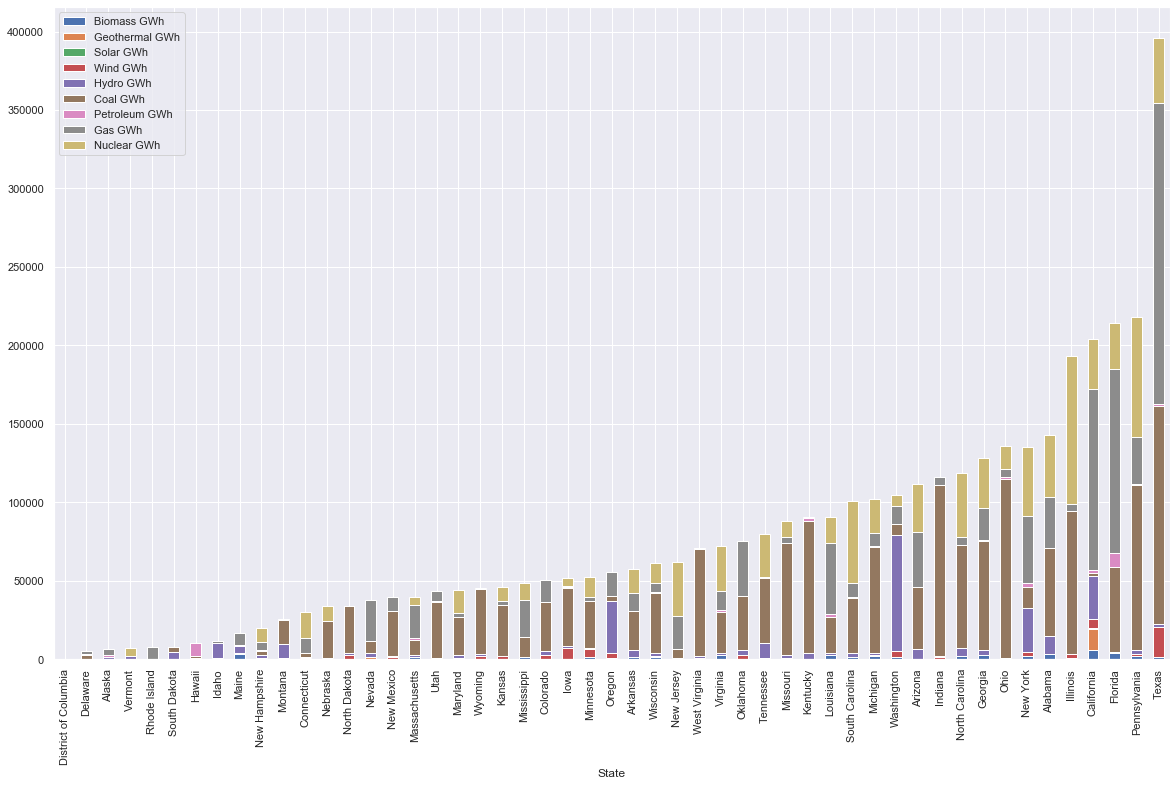

In [148]:
# Finally, plotting

df_final.plot(kind='bar', stacked=True)
# plt.title("US States")
# plt.xlabel("")
# plt.ylabel("")